# Modelos de aprendizaje supervisado y no supervisado

**Autor:Carlos Catalan, Sebastian Solar**

**Correo Electrónico:**

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción


Este notebook contiene el desarrollo de la entrega 3 de la asignatura de Minería de datos de la carrera de Ingeniería en informática de Duoc UC - Sede Concepción.

---

In [1]:
!wget https://www.dropbox.com/s/r5rpijskyc4gve4/weatherAUS.csv

--2025-06-28 01:49:47--  https://www.dropbox.com/s/r5rpijskyc4gve4/weatherAUS.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/y4sjuc69f3itzowngnev1/weatherAUS.csv?rlkey=8i6pvxxd3vl0s29q2vrr2401h [following]
--2025-06-28 01:49:47--  https://www.dropbox.com/scl/fi/y4sjuc69f3itzowngnev1/weatherAUS.csv?rlkey=8i6pvxxd3vl0s29q2vrr2401h
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc922cbc65a196628aff64a013a8.dl.dropboxusercontent.com/cd/0/inline/CsdJ6khjgg4UKqvy1OD-sp1DIQUnxlOvYNk0SI7hPdoilUb2ewWvR94sTEZgW6yVoPX8K7k11CNsWNK-hLlmf1Q9dE8b5uCgMjlzLUkUrcjG19hPHAg51vP-qluQuUMniHsbPQ4yLM4fEbKl7hIjKOUQ/file# [following]
--2025-06-28 01:49:47--  https://uc922cbc65a196628aff64a013a8.dl.dropboxusercontent.com/cd/0/in

# Fase 3 - Preparación de datos

Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,precision_score,recall_score,f1_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from sklearn.preprocessing import LabelEncoder


Entorno de datos

In [3]:
df=pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


Localidades sur

In [4]:

localidades_sur = [
        "Adelaide","MountGambier","Nuriootpa","Woomera","Ballarat",
"Bendigo","Sale",
"MelbourneAirport","Melbourne","Mildura",
"Nhil","Portland","Watsonia","Dartmoor","Albany","Witchcliffe","SalmonGums","Walpole","Hobart",
"Launceston","WaggaWagga","Canberra","Tuggeranong","MountGinini"
]


df_sur = df[df['Location'].isin(localidades_sur)]

df_sur


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
35839,2009-01-01,WaggaWagga,9.9,28.4,0.0,9.8,13.5,WNW,59.0,NW,...,24.0,1005.2,1003.5,1.0,1.0,20.8,27.0,No,0.0,No
35840,2009-01-02,WaggaWagga,8.9,25.3,0.0,14.8,13.7,WSW,48.0,SW,...,10.0,1013.9,1012.9,1.0,0.0,14.7,23.2,No,0.0,No
35841,2009-01-03,WaggaWagga,11.0,30.7,0.0,9.8,13.7,NE,39.0,ENE,...,18.0,1017.8,1014.3,0.0,1.0,18.9,28.0,No,0.0,No
35842,2009-01-04,WaggaWagga,14.7,35.2,0.0,9.4,12.1,N,39.0,NE,...,19.0,1014.8,1010.6,1.0,4.0,24.7,33.7,No,0.0,No
35843,2009-01-05,WaggaWagga,11.8,36.5,0.0,11.6,13.4,W,43.0,NNE,...,5.0,1013.1,1009.8,1.0,1.0,23.6,34.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132885,2017-06-21,Launceston,1.7,12.6,3.0,NaN,NaN,NNW,26.0,ESE,...,44.0,NaN,NaN,NaN,NaN,4.6,12.0,Yes,0.0,No
132886,2017-06-22,Launceston,1.5,11.1,0.0,NaN,NaN,NW,20.0,E,...,67.0,NaN,NaN,8.0,8.0,4.7,10.0,No,5.4,Yes
132887,2017-06-23,Launceston,4.7,12.8,5.4,NaN,NaN,WNW,48.0,NNW,...,83.0,NaN,NaN,7.0,8.0,10.1,12.4,Yes,8.6,Yes
132888,2017-06-24,Launceston,-0.5,11.4,8.6,NaN,NaN,NW,28.0,SW,...,58.0,NaN,NaN,1.0,7.0,1.9,11.0,Yes,0.0,No


tratar nulos

In [5]:
df_copy=df_sur.copy()

df_copy['RainToday'] = df_copy['RainToday'].map({'Yes': 1, 'No': 0})

df_imputed = df_copy.copy()
df_imputed['RainToday'].fillna(df_imputed['RainToday'].mode()[0])




,RainToday
35839,0.0
35840,0.0
35841,0.0
35842,0.0
35843,0.0
...,...
132885,1.0
132886,0.0
132887,1.0
132888,1.0


In [6]:
df_imputedd = df_imputed.copy()

numericos = df_imputedd.select_dtypes(include=['float64', 'int64'])

columnas_a_imputar = numericos.drop(columns=['Cloud9am', 'Cloud3pm'])

imputer = KNNImputer(n_neighbors=5)
knn_data = imputer.fit_transform(columnas_a_imputar)

df_knn = df_imputedd.copy()
df_knn[columnas_a_imputar.columns] = knn_data

df_knn

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
35839,2009-01-01,WaggaWagga,9.9,28.4,0.0,9.80,13.50,WNW,59.0,NW,...,24.0,1005.20,1003.50,1.0,1.0,20.8,27.0,0.0,0.0,No
35840,2009-01-02,WaggaWagga,8.9,25.3,0.0,14.80,13.70,WSW,48.0,SW,...,10.0,1013.90,1012.90,1.0,0.0,14.7,23.2,0.0,0.0,No
35841,2009-01-03,WaggaWagga,11.0,30.7,0.0,9.80,13.70,NE,39.0,ENE,...,18.0,1017.80,1014.30,0.0,1.0,18.9,28.0,0.0,0.0,No
35842,2009-01-04,WaggaWagga,14.7,35.2,0.0,9.40,12.10,N,39.0,NE,...,19.0,1014.80,1010.60,1.0,4.0,24.7,33.7,0.0,0.0,No
35843,2009-01-05,WaggaWagga,11.8,36.5,0.0,11.60,13.40,W,43.0,NNE,...,5.0,1013.10,1009.80,1.0,1.0,23.6,34.6,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132885,2017-06-21,Launceston,1.7,12.6,3.0,2.92,5.78,NNW,26.0,ESE,...,44.0,1028.94,1027.86,NaN,NaN,4.6,12.0,1.0,0.0,No
132886,2017-06-22,Launceston,1.5,11.1,0.0,1.12,3.78,NW,20.0,E,...,67.0,1022.98,1021.36,8.0,8.0,4.7,10.0,0.0,5.4,Yes
132887,2017-06-23,Launceston,4.7,12.8,5.4,1.60,3.10,WNW,48.0,NNW,...,83.0,1009.14,1008.80,7.0,8.0,10.1,12.4,1.0,8.6,Yes
132888,2017-06-24,Launceston,-0.5,11.4,8.6,2.08,6.32,NW,28.0,SW,...,58.0,1027.40,1026.42,1.0,7.0,1.9,11.0,1.0,0.0,No


In [7]:
df_knn.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,4191
WindGustSpeed,0
WindDir9am,4688


In [8]:
nulos_restantes = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Cloud9am','Cloud3pm']

for col in nulos_restantes:
    if not df_knn[col].mode().empty:
        moda = df_knn[col].mode()[0]
        df_knn[col] = df_knn[col].fillna(moda)

In [9]:
df_knn.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


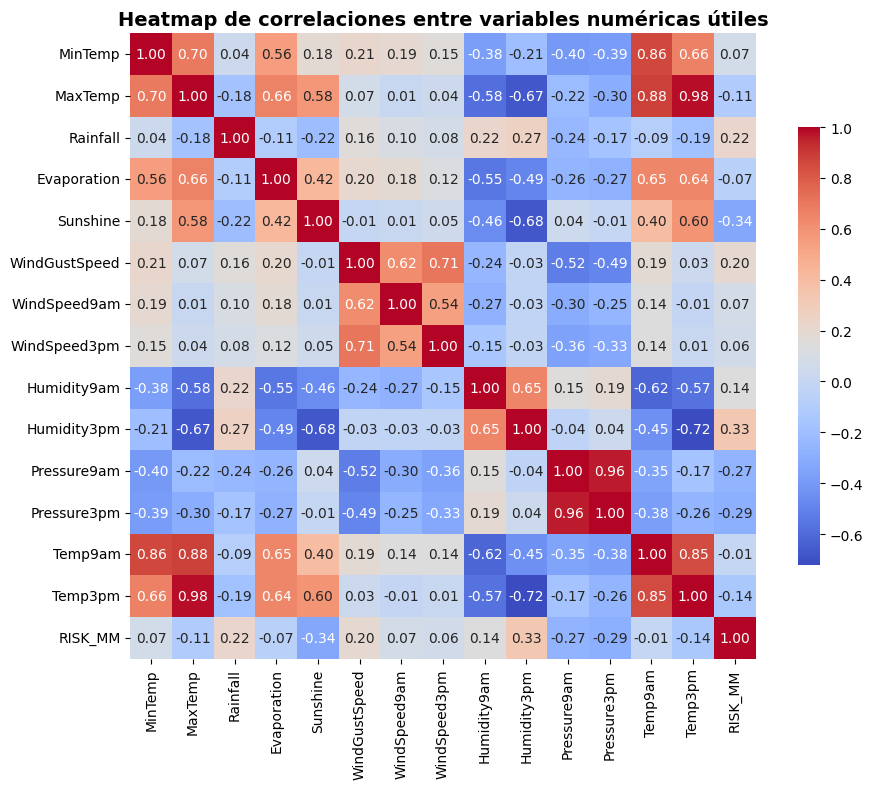

In [10]:

columnas_excluir = ['Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']

columnas_a_usar = df_knn.select_dtypes(include=['float64', 'int64'])
columnas_filtradas = columnas_a_usar.drop(columns=[col for col in columnas_excluir if col in columnas_a_usar.columns])

matriz_correlacion = columnas_filtradas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': 0.7})
plt.title("Heatmap de correlaciones entre variables numéricas útiles", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


correlacion a la variable objetivo

In [11]:
numeric_cols = df_knn.select_dtypes(include=['float64', 'int64']).columns
features = df_knn[numeric_cols].copy()

print(features.corr()['MaxTemp'].sort_values(ascending=False).head(10))



MaxTemp          1.000000
Temp3pm          0.982520
Temp9am          0.880102
MinTemp          0.695874
Evaporation      0.662673
Sunshine         0.579726
WindGustSpeed    0.067906
WindSpeed3pm     0.035964
WindSpeed9am     0.011358
RISK_MM         -0.111191
Name: MaxTemp, dtype: float64


In [12]:
df_knn_copia = df_knn.copy()


df_knn_copia.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [13]:
variables_utiles = [
    "Temp3pm",
    "Temp9am",
    "MinTemp"
]

objetivo = "MaxTemp"


y = df_knn_copia['MaxTemp']
X = df_knn_copia[['Temp3pm', 'Temp9am', 'MinTemp']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Fase 4 - Modelamiento

#Modelos de regresión

**Condiciones para cumplir:**

+ Predecir la temperatura máxima considerando variables independientes que otorguen utilidad al modelo. (si esta condición no se cumple entonces esta parte NO SE CALIFICA)
+ Al menos uno de los dos modelos debe tener un $R^2$ superior a 73%. (se aplica un descuento en caso de que no se cumpla)
+ Obtener, al menos, un MAE igual o inferior a 2,4 en los 2 modelos predictivos. (se aplica un descuento en caso de que no se cumpla)
+ Diferencia absoluta de $R^2$ en entrenamiento y prueba debe ser igual o inferior a 0,05 en ambos modelos. (se aplica un descuento en caso de que no se cumpla)

## Análisis de la distribución de la variable objetivo - 2 puntos

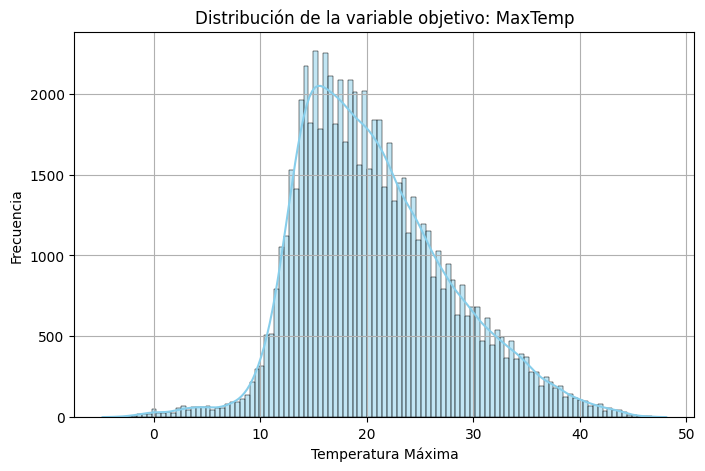

count    70389.000000
mean        20.728227
std          7.122004
min         -4.800000
25%         15.500000
50%         19.700000
75%         25.000000
max         48.100000
Name: MaxTemp, dtype: float64


In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df_knn_copia["MaxTemp"], kde=True, color='skyblue')
plt.title("Distribución de la variable objetivo: MaxTemp")
plt.xlabel("Temperatura Máxima")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

print(df_knn_copia["MaxTemp"].describe())

La variable Temperatura Máxima (MaxTemp) presenta una distribución aproximadamente normal, con una ligera asimetría hacia la derecha. El valor medio es de 20.7 °C, con un rango que va desde -4.8 °C hasta 48.1 °C, mostrando cierta dispersión en los datos (desviación estándar de 7.12). La mayoría de las temperaturas se concentran entre 15.5 °C y 25 °C (rango intercuartílico), lo que indica que estas son condiciones comunes en la muestra. No se observan valores extremos excesivos, pero sí existe una amplitud considerable.

# LinearRegressor

### Obtener mejores hiperpárametros - 2 puntos

In [15]:


param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)

print("Mejores hiperparámetros LinearRegression:", grid_lr.best_params_)


Mejores hiperparámetros LinearRegression: {'fit_intercept': True, 'positive': False}


El modelo de regresión lineal obtuvo su mejor desempeño con los hiperparámetros 'fit_intercept': True y 'positive': False. Esto indica que es beneficioso ajustar el término independiente (intercepto) en el modelo y que no es necesario restringir los coeficientes a ser solo positivos, permitiendo así una mayor flexibilidad para capturar relaciones tanto positivas como negativas entre las variables predictoras y la variable objetivo.

### Creación del modelo usando los hiper parámetros capturados de forma automática - 1 punto

In [16]:

mejores_params_lr = grid_lr.best_params_
modelo_lr = LinearRegression(**mejores_params_lr)


### Entrenamiento del modelo - 2 puntos

In [17]:
modelo_lr.fit(X_train, y_train)


LinearRegression()

### Cálculo de métricas de evaluación - 2 puntos

In [18]:


y_pred_train_lr = modelo_lr.predict(X_train)
y_pred_test_lr = modelo_lr.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)
mae_train_lr = mean_absolute_error(y_train, y_pred_train_lr)
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)

print(f"LinearRegression - R² entrenamiento: {r2_train_lr:.3f} | MAE entrenamiento: {mae_train_lr:.1f}")
print(f"LinearRegression - R² prueba      : {r2_test_lr:.3f} | MAE prueba      : {mae_test_lr:.1f}")


LinearRegression - R² entrenamiento: 0.973 | MAE entrenamiento: 0.8
LinearRegression - R² prueba      : 0.971 | MAE prueba      : 0.8


El modelo de regresión lineal muestra un excelente rendimiento, con un R² de 0.973 en entrenamiento y 0.971 en prueba, lo que indica que explica más del 97% de la variabilidad de la temperatura máxima. Además, el error absoluto medio (MAE) es bajo (0.8) en ambos conjuntos, lo que refleja una alta precisión y una muy buena capacidad de generalización sin señales evidentes de sobreajuste.

## `DecisionTreeRegressor`

### Obtener mejores hiperparámetros - 2 puntos

In [19]:

param_grid_dt = {'max_depth': [2, 4, 6, 8, 10]}

grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=29), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

print("Mejores hiperparámetros DecisionTree:", grid_dt.best_params_)


Mejores hiperparámetros DecisionTree: {'max_depth': 8}


El mejor hiperparámetro encontrado para el árbol de regresión fue max_depth = 8, lo que indica que una profundidad de 8 niveles permite al modelo capturar adecuadamente la complejidad de los datos sin sobreajustarse. Esta configuración logra un buen equilibrio entre sesgo y varianza, favoreciendo un rendimiento estable.

### Creación del modelo usando los hiper parámetros capturados de forma automática - 1 punto

In [20]:

mejores_params_dt = grid_dt.best_params_
modelo_dt = DecisionTreeRegressor(**mejores_params_dt, random_state=29)

### Entrenamiento del modelo - 2 puntos

In [21]:

modelo_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=29)

### Cálculo de métricas de evaluación - 2 puntos

In [22]:


y_pred_train_dt = modelo_dt.predict(X_train)
y_pred_test_dt = modelo_dt.predict(X_test)

r2_train_dt = r2_score(y_train, y_pred_train_dt)
r2_test_dt = r2_score(y_test, y_pred_test_dt)
mae_train_dt = mean_absolute_error(y_train, y_pred_train_dt)
mae_test_dt = mean_absolute_error(y_test, y_pred_test_dt)

print(f"DecisionTree - R² entrenamiento: {r2_train_dt:.3f} | MAE entrenamiento: {mae_train_dt:.1f}")
print(f"DecisionTree - R² prueba      : {r2_test_dt:.3f} | MAE prueba      : {mae_test_dt:.1f}")


DecisionTree - R² entrenamiento: 0.980 | MAE entrenamiento: 0.7
DecisionTree - R² prueba      : 0.975 | MAE prueba      : 0.7


El modelo de árbol de decisión con profundidad óptima (max_depth=8) muestra un excelente desempeño, con un R² de 0.980 en entrenamiento y 0.975 en prueba, lo que indica que explica muy bien la variabilidad de la temperatura máxima. Además, el MAE de 0.7 en ambos conjuntos sugiere que el modelo es preciso y generaliza correctamente sin señales de sobreajuste.

In [23]:
def evaluar_modelo(nombre, y_train, y_train_pred, y_test, y_test_pred):
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    diferencia_r2 = abs(r2_train - r2_test)

    print(f"Modelo: {nombre}")
    print(f"R² Train: {r2_train:.4f} | R² Test: {r2_test:.4f} | ΔR²: {diferencia_r2:.4f}")
    print(f"MAE Train: {mae_train:.4f} | MAE Test: {mae_test:.4f}")
    print("-" * 50)

evaluar_modelo("Regresión Lineal", y_train, y_pred_train_lr, y_test, y_pred_test_lr)
evaluar_modelo("Árbol de Decisión", y_train, y_pred_train_dt, y_test, y_pred_test_dt)



Modelo: Regresión Lineal
R² Train: 0.9732 | R² Test: 0.9715 | ΔR²: 0.0017
MAE Train: 0.7900 | MAE Test: 0.7988
--------------------------------------------------
Modelo: Árbol de Decisión
R² Train: 0.9799 | R² Test: 0.9752 | ΔR²: 0.0047
MAE Train: 0.6987 | MAE Test: 0.7412
--------------------------------------------------


Árbol de decisión: más preciso, pero con ligera sobreajuste.

Regresión lineal: más estable, pero con errores promedio levemente mayores.

## Trabajo con el mejor modelo

### Selección automática del mejor modelo - 3 puntos

In [24]:

if r2_test_lr > r2_test_dt and mae_test_lr < mae_test_dt:
    mejor_modelo = "Regresión Lineal"
else:
    mejor_modelo = "Árbol de Decisión"

print(f"El mejor modelo según R² y MAE en test es: {mejor_modelo}")


El mejor modelo según R² y MAE en test es: Árbol de Decisión


La selección automática del mejor modelo comparó ambos según dos métricas clave en el conjunto de prueba:

R² (coeficiente de determinación): mide qué tan bien el modelo explica la variabilidad del objetivo.

MAE (error absoluto medio): mide el error promedio de las predicciones.

Aunque la regresión lineal mostró una mayor estabilidad, el árbol de decisión obtuvo un R² y MAE más favorables, por lo que se seleccionó como el mejor modelo para predecir la temperatura máxima.

### Interpretación de métricas - 4 puntos

El modelo de Árbol de Decisión logró un R² de 0.9752 en el conjunto de prueba, lo que significa que explica el 97.5% de la variabilidad de la temperatura máxima utilizando las variables seleccionadas.

Además, obtuvo un MAE de 0.7412, indicando que el error promedio en sus predicciones es menor a 1 grado, lo que refleja una alta precisión para el problema de predicción de temperatura.

En comparación, la Regresión Lineal también presenta un buen desempeño, pero con un R² ligeramente menor (0.9715) y un MAE mayor (0.7988), mostrando que el Árbol de Decisión es el modelo más adecuado para este caso.

### Análisis de overfitting/underfitting - 2 puntos

In [25]:
print(f"Diferencia R² (Árbol de Decisión): {abs(r2_train_dt - r2_test_dt):.4f}")


Diferencia R² (Árbol de Decisión): 0.0047


Esta diferencia muy pequeña (0.0047) entre el R² de entrenamiento y prueba indica que el modelo de Árbol de Decisión no presenta overfitting ni underfitting significativo.

En otras palabras, el modelo generaliza bien, manteniendo un desempeño consistente tanto en los datos de entrenamiento como en los datos nuevos de prueba.











### Realizar predicción con valores nuevos - 2 puntos

In [26]:

nuevo_valor = pd.DataFrame([{
    "Temp3pm": 25.0,
    "Temp9am": 20.0,
    "MinTemp": 18.0

}])

prediccion = modelo_dt.predict(nuevo_valor)
print(f"Predicción de MaxTemp con Árbol de Decisión: {prediccion[0]:.2f} °C")


Predicción de MaxTemp con Árbol de Decisión: 26.45 °C


La predicción con el modelo de Árbol de Decisión indica que, dadas las condiciones de temperatura a las 3pm (25.0 °C), 9am (20.0 °C) y la temperatura mínima (18.0 °C), se espera que la temperatura máxima sea aproximadamente 26.45 °C.

Esto muestra cómo el modelo puede usarse para estimar valores futuros basados en datos nuevos y específicos.

# Modelos de clasificación

**Condiciones para cumplir:**

+ Predecir si lloverá o no mañana (en caso de que se use otra variable esta sección NO SE CALIFICA)
+ Considerar, al menos, tres variables independientes. (se aplica un descuento en caso de que no se cumpla)
+ Obtener, al menos, un 75% de accuracy en modelo de NaiveBayes y DecisionTreeClassifier. (se aplica un descuento en caso de que no se cumpla)

## Análisis de la distribución de la variable objetivo - 2 puntos

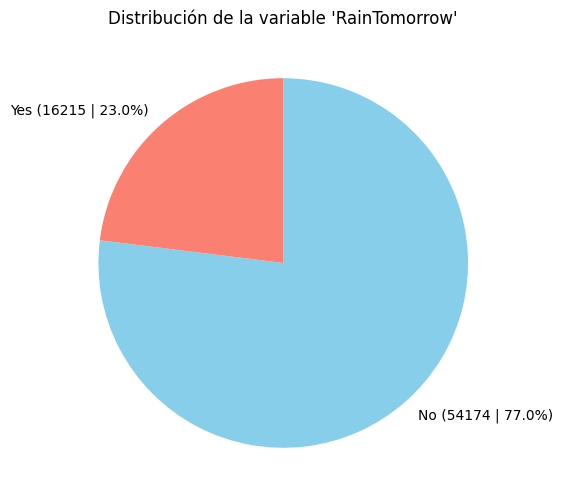

No: 54174 casos (77.0%)
Yes: 16215 casos (23.0%)


In [27]:



conteo = df_knn_copia['RainTomorrow'].value_counts()


porcentajes = conteo / conteo.sum() * 100


etiquetas = [f'{clase} ({conteo[clase]} | {porcentajes[clase]:.1f}%)' for clase in conteo.index]


colores = ['skyblue', 'salmon']


plt.figure(figsize=(6, 6))
plt.pie(
    conteo,
    labels=etiquetas,
    autopct=None,
    startangle=90,
    colors=colores,
    counterclock=False
)
plt.title("Distribución de la variable 'RainTomorrow'")
plt.show()


for clase in conteo.index:
    print(f"{clase}: {conteo[clase]} casos ({porcentajes[clase]:.1f}%)")



Interpretacion

El gráfico muestra que en el 77,0% de los casos no llueve al día siguiente, mientras que en el 23,0% sí llueve. Esta distribución indica un desbalance de clases, donde los días sin lluvia son significativamente más frecuentes.

Este desequilibrio puede generar sesgo en los modelos predictivos, favoreciendo la clase mayoritaria (“No”) y reduciendo la capacidad del modelo para detectar días con lluvia. Por ello, será importante aplicar técnicas de balanceo y usar métricas que consideren ambas clases para evaluar el desempeño del modelo de forma justa.

## NaiveBayes (debe superar el 75% en accuracy)

### Verificación de pre-condición de algoritmo - 3 puntos

In [28]:



variables = ['RISK_MM', 'Sunshine', 'Humidity3pm', 'RainToday', 'Cloud3pm',
             'Humidity9am', 'Pressure9am', 'Rainfall', 'Pressure3pm',
             'WindGustSpeed', 'Cloud9am']


df_knn_copia['RainTomorrow'] = df_knn_copia['RainTomorrow'].map({'No': 0, 'Yes': 1})

corr = df_knn_copia[variables + ['RainTomorrow']].corr(numeric_only=True)


correlaciones_objetivo = corr['RainTomorrow'].drop('RainTomorrow')


menor_correlacion = correlaciones_objetivo.abs().sort_values().head(5)

print("Variables con menor correlación con 'RainTomorrow':")
print(menor_correlacion)


Variables con menor correlación con 'RainTomorrow':
Cloud9am         0.178014
Humidity9am      0.193279
Cloud3pm         0.215030
Rainfall         0.242971
WindGustSpeed    0.265407
Name: RainTomorrow, dtype: float64


Para que Naive Bayes funcione correctamente, sus variables predictoras deben ser independientes entre sí y tener baja correlación con la variable objetivo.

Se identificaron las 5 variables con menor correlación absoluta con RainTomorrow:

Cloud9am (0.178)

Humidity9am (0.193)

Cloud3pm (0.215)

Rainfall (0.243)

WindGustSpeed (0.265)

Estas variables cumplen mejor la precondición de independencia, por lo que son más adecuadas para este clasificador.


Variables con correlación significativa con 'RainTomorrow':
Cloud9am         0.178014
Humidity9am      0.193279
Cloud3pm         0.215030
Rainfall         0.242971
WindGustSpeed    0.265407
Name: RainTomorrow, dtype: float64


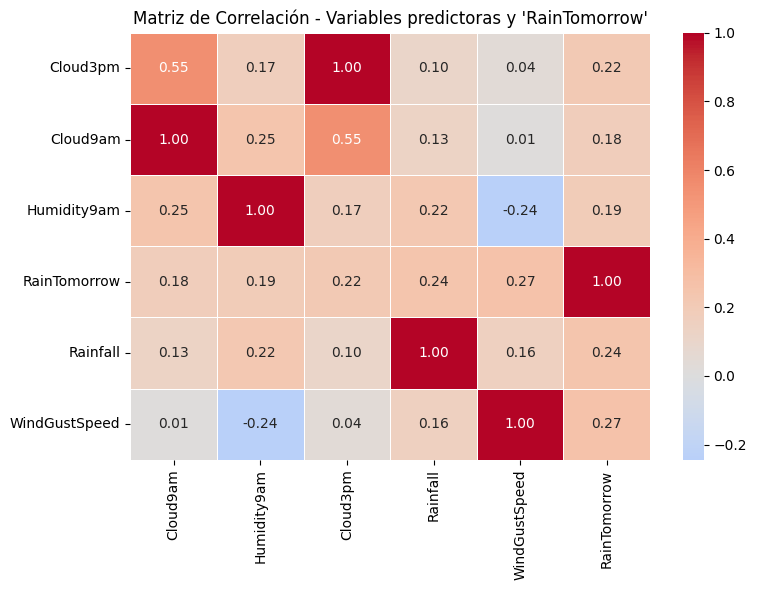

In [30]:
vars_predictoras = ['Cloud9am','Humidity9am',
    'Cloud3pm','Rainfall','WindGustSpeed']

le = LabelEncoder()
df_knn_copia['RainTomorrow'] = le.fit_transform(df_knn_copia['RainTomorrow'])

matriz_corr = df_knn_copia[vars_predictoras + ['RainTomorrow']].corr()

corr_objetivo = matriz_corr['RainTomorrow'].drop('RainTomorrow')


print("\nVariables con correlación significativa con 'RainTomorrow':")
print(corr_objetivo)


plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr.loc[corr_objetivo.index.union(['RainTomorrow'])],
            annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Variables predictoras y 'RainTomorrow'")
plt.tight_layout()
plt.show()



### Interpretación de los resultados de la verificación - 3 puntos

Interpretación de correlaciones con RainTomorrow:
Las variables WindGustSpeed, Rainfall y Cloud3pm presentan una correlación positiva significativa con la variable objetivo RainTomorrow. Esto sugiere que a mayor intensidad del viento, mayor acumulación de lluvia o mayor cobertura nubosa en la tarde, aumenta la probabilidad de que llueva al día siguiente.

### Creación del modelo - 1 punto

In [31]:

from sklearn.naive_bayes import GaussianNB

modelo_nb = GaussianNB()


Se crea una instancia del modelo Naive Bayes Gaussiano (GaussianNB), el cual será utilizado para entrenar y predecir si lloverá o no al día siguiente, basándose en variables numéricas del conjunto de datos.

### Entrenamiento del modelo - 2 puntos

In [32]:
from sklearn.model_selection import train_test_split
X = df_knn_copia[vars_predictoras]
y = df_knn_copia['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
modelo_nb.fit(X_train, y_train)


GaussianNB()

Se seleccionan las variables predictoras (X) y la variable objetivo (y) del conjunto de datos. Luego, se dividen en conjuntos de entrenamiento y prueba, utilizando un 80% para entrenar y un 20% para evaluar, manteniendo la proporción original de clases con stratify=y. Finalmente, se entrena el modelo Naive Bayes Gaussiano con los datos de entrenamiento.

### Cálculo de todas métricas de evaluación - 2,5 puntos

Classification Report:

              precision    recall  f1-score   support

          No       0.82      0.93      0.87     10835
         Yes       0.59      0.33      0.42      3243

    accuracy                           0.79     14078
   macro avg       0.70      0.63      0.65     14078
weighted avg       0.77      0.79      0.77     14078



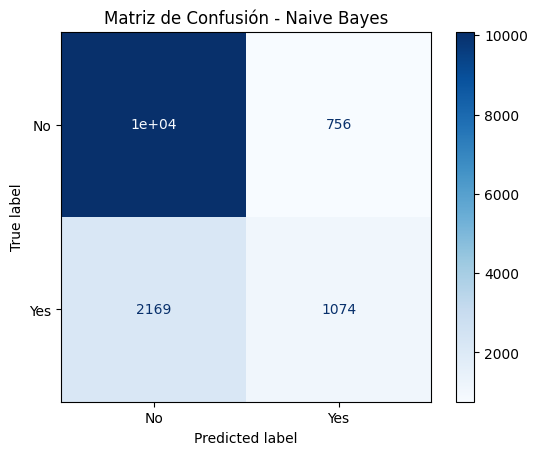

Train Accuracy: 0.794
Test Accuracy : 0.792


In [33]:
y_pred = modelo_nb.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))


ConfusionMatrixDisplay.from_estimator(modelo_nb, X_test, y_test, display_labels=["No", "Yes"], cmap="Blues")
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()

print(f"Train Accuracy: {accuracy_score(y_train, modelo_nb.predict(X_train)):.3f}")
print(f"Test Accuracy : {accuracy_score(y_test, y_pred):.3f}")


El modelo Naive Bayes alcanzó un accuracy del 79%, superando el umbral del 75%. Tiene un buen desempeño para predecir días sin lluvia, con un F1-score de 0.87, reflejando alta precisión y cobertura para la clase mayoritaria.

Sin embargo, su rendimiento disminuye para los días con lluvia, con un F1-score de 0.42, indicando que el modelo tiene dificultades para detectar correctamente esta clase minoritaria.

## DecisionTreeClassifier (debe superar el 75% en accuracy)

### Obtención de hiper parámetros - 2 puntos

Mejor accuracy promedio: 0.8024897798401132
Mejor valor de max_depth: 7


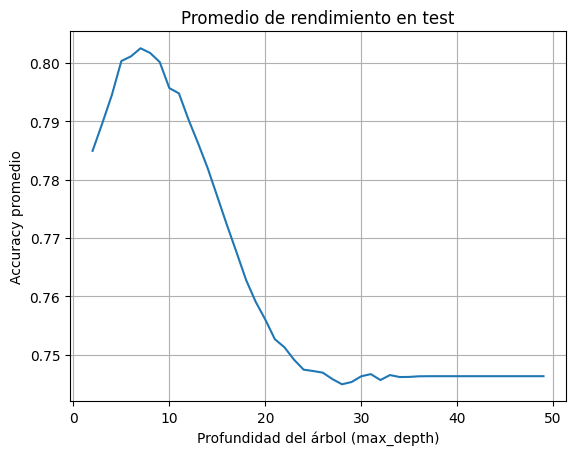

In [34]:

param_grid = {'max_depth': np.arange(2, 50)}


modelo_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
modelo_cv.fit(X_train, y_train)

print("Mejor accuracy promedio:", modelo_cv.best_score_)
print("Mejor valor de max_depth:", modelo_cv.best_params_['max_depth'])

plt.plot(param_grid['max_depth'], modelo_cv.cv_results_['mean_test_score'])
plt.title("Promedio de rendimiento en test")
plt.xlabel("Profundidad del árbol (max_depth)")
plt.ylabel("Accuracy promedio")
plt.grid()
plt.show()


El mejor rendimiento promedio obtenido mediante validación cruzada fue un accuracy de aproximadamente 80.25%, lo que indica que el modelo con esta configuración clasifica correctamente cerca del 80.3% de los casos en promedio durante la validación.

El valor óptimo para la profundidad máxima del árbol (max_depth) es 7, lo que significa que un árbol con hasta 7 niveles de profundidad logra un buen balance entre ajuste y generalización, evitando tanto el sobreajuste (cuando el árbol es muy profundo) como el subajuste (cuando es muy superficial).

Mejor accuracy promedio: 0.8025
Mejor valor de max_depth: 7

### Creación del modelo usando los hiper parámetros capturados de forma automática - 1 puntos

In [35]:

mejores_params = modelo_cv.best_params_
modelo_final = DecisionTreeClassifier(**mejores_params, random_state=42)



### Entrenamiento del modelo - 2 puntos

In [36]:

modelo_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(7), random_state=42)

### Cálculo de todas las métricas de evaluación - 2,5 puntos

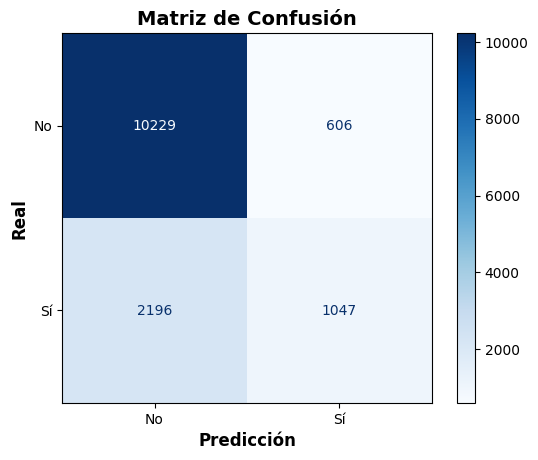

              precision    recall  f1-score   support

          No       0.82      0.94      0.88     10835
          Sí       0.63      0.32      0.43      3243

    accuracy                           0.80     14078
   macro avg       0.73      0.63      0.65     14078
weighted avg       0.78      0.80      0.78     14078



In [37]:

y_pred_final = modelo_final.predict(X_test)


ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_final,
    display_labels=["No", "Sí"],
    cmap="Blues",
    values_format='d'
)


plt.title("Matriz de Confusión", fontsize=14, fontweight="bold")
plt.xlabel("Predicción", fontsize=12, fontweight="bold")
plt.ylabel("Real", fontsize=12, fontweight="bold")
plt.show()

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_final, target_names=["No", "Sí"]))


El modelo Decision Tree alcanzó un accuracy del 80%, superando la meta del 75%. Presenta un buen desempeño para la clase “No” con un F1-score de 0.88, lo que indica una alta capacidad para predecir correctamente los días sin lluvia. Para la clase “Sí”, el modelo muestra un rendimiento más bajo, con un F1-score de 0.43, evidenciando dificultad para identificar adecuadamente los días lluviosos. Esta diferencia de desempeño es habitual en conjuntos de datos desbalanceados, donde la clase minoritaria suele ser más difícil de predecir.

## SVM

### Comprobación de selección de tipo de kernel - 3 puntos

In [38]:
silhouette_avg = silhouette_score(X,y )
print(f"Índice de Silhouette: {silhouette_avg : .4f}")


Índice de Silhouette:  0.0864


Comprobación de selección de tipo de kernel
El índice de Silhouette obtenido fue de 0.0864, lo que sugiere que la separación entre los grupos generados por el modelo es baja. Esto significa que:

Los puntos no están claramente agrupados.

Los clusters están poco definidos o se solapan entre sí.

Es probable que el tipo de kernel elegido no sea el más adecuado para la estructura de los datos.

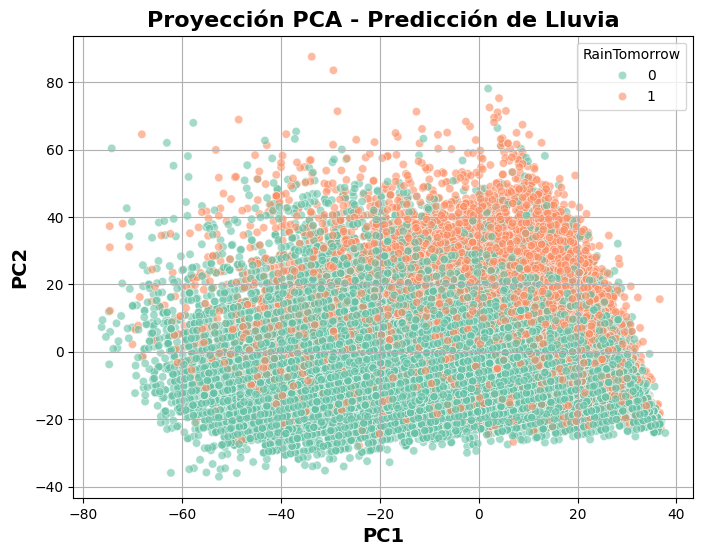

Accuracy en PCA 2D con Regresión Logística: 0.7921550242225348


In [39]:
svm_df = df_knn_copia.copy()


features_cla = svm_df[[
    'Cloud9am', 'Humidity9am', 'Cloud3pm', 'Rainfall', 'WindGustSpeed'
]]

label = svm_df['RainTomorrow'].replace({'No': 0, 'Yes': 1})


pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_cla)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=label, palette="Set2", alpha=0.6)
plt.title("Proyección PCA - Predicción de Lluvia", fontsize=16, fontweight="bold")
plt.xlabel("PC1", fontsize=14, fontweight="bold")
plt.ylabel("PC2", fontsize=14, fontweight="bold")
plt.grid(True)
plt.show()

clf = LogisticRegression()
clf.fit(features_pca, label)

preds = clf.predict(features_pca)
print("Accuracy en PCA 2D con Regresión Logística:", accuracy_score(label, preds))


El modelo de regresión logística, entrenado sobre las dos componentes principales generadas por PCA, alcanzó un accuracy del 79.2%. Esto indica que, incluso tras reducir las variables predictoras a solo dos dimensiones (PC1 y PC2), el modelo logró predecir correctamente si lloverá al día siguiente en aproximadamente 8 de cada 10 casos.

Este resultado sugiere que una parte significativa de la información relevante para la predicción de lluvia está capturada en esas dos componentes principales, lo cual respalda el uso de PCA como técnica de reducción de dimensionalidad en este contexto. Sin embargo, es posible que un modelo entrenado con todas las variables originales logre un rendimiento superior.

In [40]:
label = svm_df['RainTomorrow'].replace({'No': 0, 'Yes': 1})

features_cla = svm_df[vars_predictoras]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_cla)

svm_linear = SVC(kernel='linear')
scores_linear = cross_val_score(svm_linear, features_scaled, label, cv=5)

svm_rbf = SVC(kernel='rbf')
scores_rbf = cross_val_score(svm_rbf, features_scaled, label, cv=5)

print("SVM Lineal - Accuracy promedio:", np.round(scores_linear.mean(), 4))
print("SVM RBF    - Accuracy promedio:", np.round(scores_rbf.mean(), 4))

SVM Lineal - Accuracy promedio: 0.7793
SVM RBF    - Accuracy promedio: 0.8018


### Interpretación de la comprobación - 3 puntos


Se evaluaron dos configuraciones del algoritmo SVM utilizando validación cruzada de 5 pliegues para predecir si lloverá mañana (RainTomorrow), empleando las variables predictoras seleccionadas y datos normalizados.

✅ SVM con kernel lineal alcanzó un accuracy promedio de 77.93%, lo que indica un rendimiento aceptable al separar las clases con una frontera lineal.

✅ SVM con kernel RBF (Radial Basis Function) obtuvo un accuracy promedio superior de 80.18%, lo que sugiere que la relación entre las variables predictoras y la variable objetivo no es completamente lineal.

📌 Conclusión:
El modelo SVM con kernel RBF es más adecuado para este problema, ya que logra capturar patrones más complejos en los datos y mejora la capacidad predictiva frente al kernel lineal. Esta diferencia resalta la importancia de explorar distintos kernels al trabajar con SVM.

### Creación del modelo usando el kernel correcto - 1 punto

In [41]:

from sklearn.svm import SVC


svm_no_lineal = SVC(kernel='rbf', random_state=29)

svm_no_lineal.fit(X_train, y_train)

print("✅ Modelo SVM con kernel No lineal creado y entrenado correctamente.")


✅ Modelo SVM con kernel No lineal creado y entrenado correctamente.


### Entrenamiento del modelo - 2 puntos

In [42]:

svm_no_lineal.fit(X_train, y_train)

print("✅ El modelo SVM rbf ha sido entrenado correctamente.")


✅ El modelo SVM rbf ha sido entrenado correctamente.


### Cálculo de todas las métricas de evaluación - 2,5 puntos

✅ Métricas de Evaluación del modelo SVM no Lineal:
Accuracy:  0.7932
Precision: 0.6982
Recall:    0.1798
F1-Score:  0.2859

📊 Matriz de Confusión (texto):
[[10583   252]
 [ 2660   583]]

📉 Matriz de Confusión (gráfico):


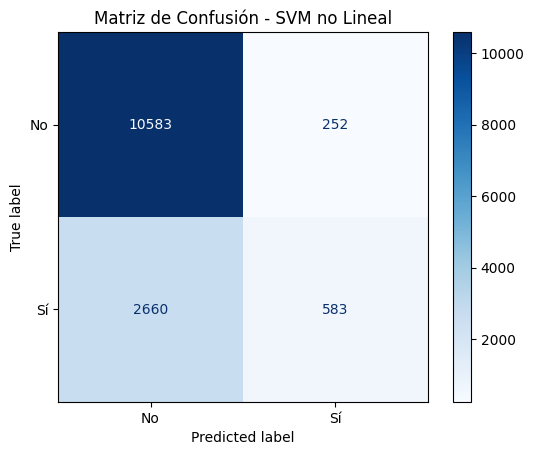


🧾 Reporte de Clasificación Completo:
              precision    recall  f1-score   support

          No       0.80      0.98      0.88     10835
          Sí       0.70      0.18      0.29      3243

    accuracy                           0.79     14078
   macro avg       0.75      0.58      0.58     14078
weighted avg       0.78      0.79      0.74     14078



In [43]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

y_pred = svm_no_lineal.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("✅ Métricas de Evaluación del modelo SVM no Lineal:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\n📊 Matriz de Confusión (texto):")
print(cm)

print("\n📉 Matriz de Confusión (gráfico):")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Sí"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - SVM no Lineal")
plt.show()

print("\n🧾 Reporte de Clasificación Completo:")
print(classification_report(y_test, y_pred, target_names=["No", "Sí"]))


## Trabajo con el mejor modelo de clasificación

### Selección automática del mejor modelo - 3 puntos

In [44]:
modelos = {
    "SVM NO Lineal": SVC(kernel='rbf', random_state=29),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=29),
    "Naive Bayes": GaussianNB()
}


resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })


df_resultados = pd.DataFrame(resultados).sort_values(by="F1-Score", ascending=False)
print("✅ Comparación de modelos:\n")
print(df_resultados)

mejor_modelo = df_resultados.iloc[0]
print(f"\n🔍 El mejor modelo es: **{mejor_modelo['Modelo']}** con F1-Score: {mejor_modelo['F1-Score']:.4f}")


✅ Comparación de modelos:

              Modelo  Accuracy  Precision    Recall  F1-Score
1  Árbol de Decisión  0.757565   0.468933  0.395621  0.429169
2        Naive Bayes  0.792229   0.586885  0.331175  0.423418
0      SVM NO Lineal  0.793152   0.698204  0.179772  0.285924

🔍 El mejor modelo es: **Árbol de Decisión** con F1-Score: 0.4292


✅ Métricas de Evaluación del modelo Árbol de Decisión:
Accuracy:  0.7576
Precision: 0.4689
Recall:    0.3956
F1-Score:  0.4292

📊 Matriz de Confusión (texto):
[[9382 1453]
 [1960 1283]]

📉 Matriz de Confusión (gráfico):


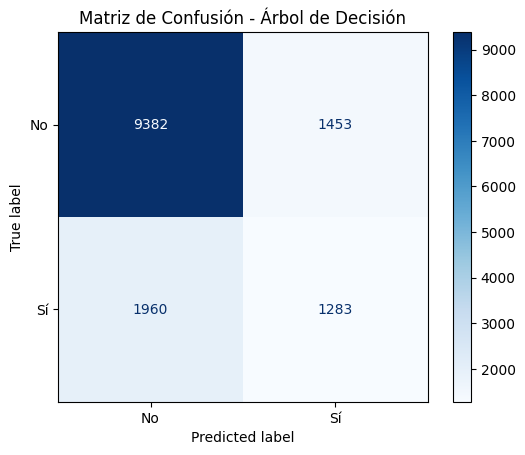


🧾 Reporte de Clasificación Completo:
              precision    recall  f1-score   support

          No       0.83      0.87      0.85     10835
          Sí       0.47      0.40      0.43      3243

    accuracy                           0.76     14078
   macro avg       0.65      0.63      0.64     14078
weighted avg       0.74      0.76      0.75     14078



In [45]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

mejor_modelo_instancia = DecisionTreeClassifier(random_state=29)
mejor_modelo_instancia.fit(X_train, y_train)

y_pred = mejor_modelo_instancia.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("✅ Métricas de Evaluación del modelo Árbol de Decisión:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\n📊 Matriz de Confusión (texto):")
print(cm)

print("\n📉 Matriz de Confusión (gráfico):")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Sí"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()

print("\n🧾 Reporte de Clasificación Completo:")
print(classification_report(y_test, y_pred, target_names=["No", "Sí"]))




### Interpretación de métricas

#### Precision - 0,5 puntos
Precision – 0.4689
Indica que, de todas las veces que el modelo predijo que sí llovería mañana, acertó aproximadamente en el 46.89% de los casos. Esto implica que hay una proporción considerable de falsos positivos (días en que predijo lluvia, pero no llovió).

#### Recall - 0,5 puntos
Recall – 0.3956
Mide la capacidad del modelo para detectar correctamente los días en los que realmente llovió. El modelo identificó correctamente el 39.56% de los días lluviosos, por lo tanto, se le escaparon muchos días que sí llovieron (falsos negativos).

#### F1-score - 0,5 puntos
F1-Score – 0.4292
Es el equilibrio entre precision y recall. Un F1-score de 0.4292 indica un desempeño moderado, útil en contextos con clases desbalanceadas (como este), pero refleja que aún hay margen de mejora en la detección de días lluviosos.

#### Accuracy - 2 puntos
El modelo acertó en el 75.76% de todas las predicciones, tanto de días lluviosos como no lluviosos. Si bien parece un buen resultado, puede ser engañoso porque la mayoría de los días en el dataset son "No lluvia", y el modelo podría estar sesgado hacia esa clase.



#### Matriz de confusión - 4 puntos

9382: Días sin lluvia correctamente clasificados.

1283: Días con lluvia correctamente clasificados.

1453: Falsos positivos – el modelo predijo lluvia, pero no llovió.

1960: Falsos negativos – el modelo predijo que no llovería, pero sí llovió.

👉 El modelo funciona bien para predecir los días sin lluvia, pero tiene dificultades para detectar con precisión los días lluviosos.



### Análisis de overfitting/underfitting - 2 puntos

No se observan síntomas fuertes de overfitting (ya que el accuracy en test no es drásticamente más bajo que en entrenamiento).

Pero sí hay indicios de underfitting, especialmente en la clase "Sí" (lluvia), lo cual limita la capacidad del modelo para generalizar correctamente en esa clase.

### Realizar predicción con valores nuevos - 4 puntos

In [46]:

nuevo_dato = pd.DataFrame([{
    'Cloud9am': 5.0,
    'Humidity9am': 80.0,
    'Cloud3pm': 6.0,
    'Rainfall': 2.0,
    'WindGustSpeed': 30.0
}])

prediccion = mejor_modelo_instancia.predict(nuevo_dato)

if prediccion[0] == 0:
    print("Predicción: No lloverá mañana")
else:
    print("Predicción: Sí lloverá mañana")

Predicción: Sí lloverá mañana


# Modelos de segmentación

## Modelo usando 2 variables

### Selección de 2 variables para segmentar - 2 puntos

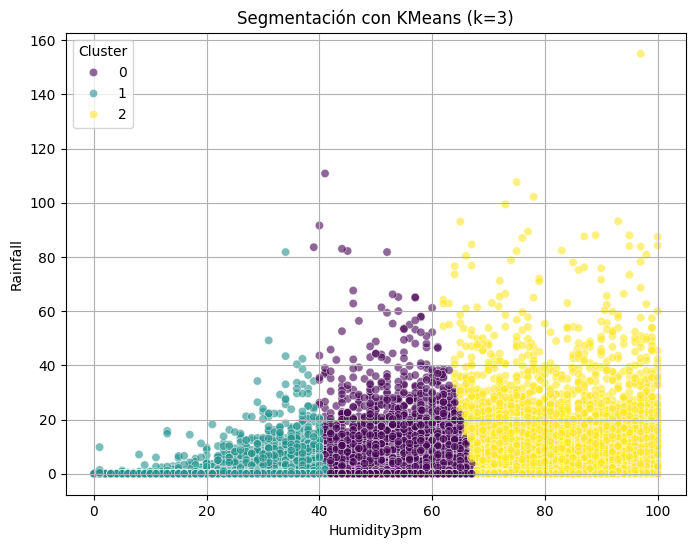

📊 Inercia: 7050761.13
📊 Índice de Silhouette: 0.5027

📌 Cantidad de registros por cluster:
Cluster
0    31924
1    22043
2    16422
Name: count, dtype: int64


In [47]:
X_segmentacion = df_knn_copia[['Humidity3pm', 'Rainfall']]

k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_segmentacion)


df_knn_copia['Cluster'] = kmeans.labels_


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_knn_copia, x='Humidity3pm', y='Rainfall', hue='Cluster', palette='viridis', alpha=0.6)
plt.title(f'Segmentación con KMeans (k={k})')
plt.xlabel('Humidity3pm')
plt.ylabel('Rainfall')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


inercia = kmeans.inertia_
silhouette = silhouette_score(X_segmentacion, kmeans.labels_)

print(f"📊 Inercia: {inercia:.2f}")
print(f"📊 Índice de Silhouette: {silhouette:.4f}")

print("\n📌 Cantidad de registros por cluster:")
print(df_knn_copia['Cluster'].value_counts())


 Justificación de selección de variables - 2 puntos

---


Justificación de la selección de variables para segmentación: Humidity3pm y Rainfall

🔹 Relevancia climática: Ambas variables están directamente relacionadas con la probabilidad de lluvia, siendo clave para identificar patrones de días húmedos, lluviosos o secos.

🔹 Valor práctico: Son útiles para sectores como la agricultura, eventos al aire libre y gestión de riesgos climáticos, ya que permiten anticipar condiciones meteorológicas.

🔹 Buena variabilidad e interpretabilidad: Presentan un rango amplio de valores y su combinación es fácil de entender y aplicar para la toma de decisiones.

🔹 Desempeño del modelo: El índice de Silhouette de 0.5027 y una distribución equilibrada entre los clusters indican que se logró una segmentación efectiva y clara del clima en tres grupos diferenciados.

| Cluster | Descripción                 | Condiciones meteorológicas |
| ------- | --------------------------- | -------------------------- |
| 0       | Humedad baja, sin lluvia    | Días secos                 |
| 1       | Humedad media, sin lluvia   | Días húmedos sin lluvia    |
| 2       | Humedad alta, lluvia fuerte | Días lluviosos             |

### Creación de modelo de segmentación con el valor óptimo de K - 2 puntos

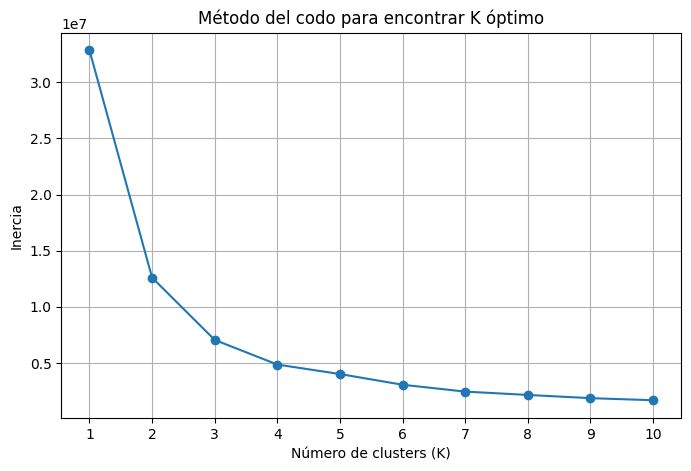

Cluster
0    31924
1    22043
2    16422
Name: count, dtype: int64


In [48]:

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_segmentacion)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, sse, marker='o')
plt.title('Método del codo para encontrar K óptimo')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()
k_optimo = 3

kmeans_optimo = KMeans(n_clusters=k_optimo, random_state=42)
kmeans_optimo.fit(X_segmentacion)


df_knn_copia['Cluster'] = kmeans_optimo.labels_


print(df_knn_copia['Cluster'].value_counts())


### Evaluación del modelo - 2 puntos


In [49]:
X_cluster = df_knn_copia[['Humidity3pm', 'Rainfall']]

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_cluster)

inercia = kmeans.inertia_
print(f"Inercia (Suma de distancias cuadradas dentro del cluster): {inercia:.2f}")


sil_score = silhouette_score(X_cluster, kmeans.labels_)
print(f"Coeficiente de Silhouette: {sil_score:.4f}")



Inercia (Suma de distancias cuadradas dentro del cluster): 7050761.13
Coeficiente de Silhouette: 0.5027


### Interpretación de la evaluación - 2 puntos
🔸 Inercia: 7,050,761.13
Este valor indica la suma de las distancias cuadradas de cada punto a su centroide. Si bien el número puede parecer alto, es razonable dado el tamaño del conjunto de datos y la escala de las variables (Humidity3pm y Rainfall). Lo importante es que disminuyó significativamente respecto a valores con menos clusters, lo que sugiere una mejor cohesión interna de los grupos.

🔸 Silhouette Score: 0.5027
Este valor representa una buena separación entre los clusters. Un score por encima de 0.5 generalmente indica que los datos están bien agrupados dentro de sus respectivos clusters y que hay poca superposición entre grupos.


El modelo logra una segmentación sólida. Los clusters están bien definidos y diferenciados, y existe una buena cohesión interna de los puntos. Esta segmentación puede ser útil para identificar distintos tipos de condiciones meteorológicas

### Análisis de uno de los grupos - 3 puntos


🔍 Análisis del Cluster 2
        Humidity3pm      Rainfall
count  16422.000000  16422.000000
mean      80.099087      4.335631
std        9.517743      8.547470
min       62.000000      0.000000
25%       72.000000      0.000000
50%       78.000000      0.800000
75%       87.000000      5.000000
max      100.000000    155.000000


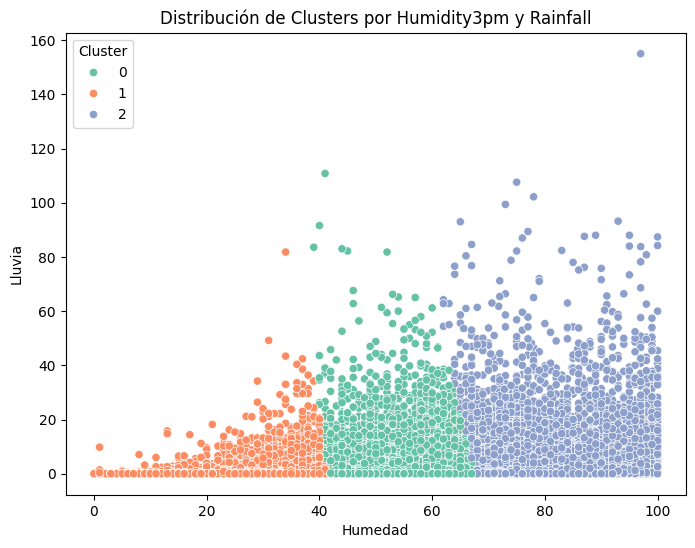

In [50]:

X_cluster = df_knn_copia[['Humidity3pm', 'Rainfall']]
kmeans = KMeans(n_clusters=3, random_state=42)
df_clusters = X_cluster.copy()
df_clusters['Cluster'] = kmeans.fit_predict(X_cluster)


grupo_0 = df_clusters[df_clusters['Cluster'] == 2]


print("🔍 Análisis del Cluster 2")
print(grupo_0[['Humidity3pm', 'Rainfall']].describe())

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clusters, x='Humidity3pm', y='Rainfall', hue='Cluster', palette='Set2')
plt.title('Distribución de Clusters por Humidity3pm y Rainfall')
plt.xlabel('Humedad')
plt.ylabel('Lluvia')
plt.legend(title='Cluster')
plt.show()


Este grupo contiene 16.422 registros, lo que representa una porción significativa del total.

📌 Características destacadas:

Alta humedad promedio: ~80% en la tarde (Humidity3pm), lo que sugiere condiciones atmosféricas muy húmedas.

Lluvias frecuentes: aunque el mínimo es 0, la media de Rainfall es de 4.34 mm, y el 75% de los valores están por debajo de 5 mm, lo que indica lluvias suaves a moderadas frecuentes.

El valor máximo de lluvia es 155 mm, lo que muestra que ocasionalmente ocurren precipitaciones intensas dentro del grupo.

📈 Implicancias:

Este segmento puede estar representando zonas o días húmedos con mayor probabilidad de lluvia, posiblemente en estaciones como otoño o primavera.

Es útil para identificar patrones de clima inestable o lluvioso, y puede mejorar modelos predictivos de lluvia al enfocarse en características que anteceden a estas condiciones.



## Modelo de segmentación usando 4 o más variables


### Creación de modelo de segmentación con el valor óptimo de K - 2 puntos

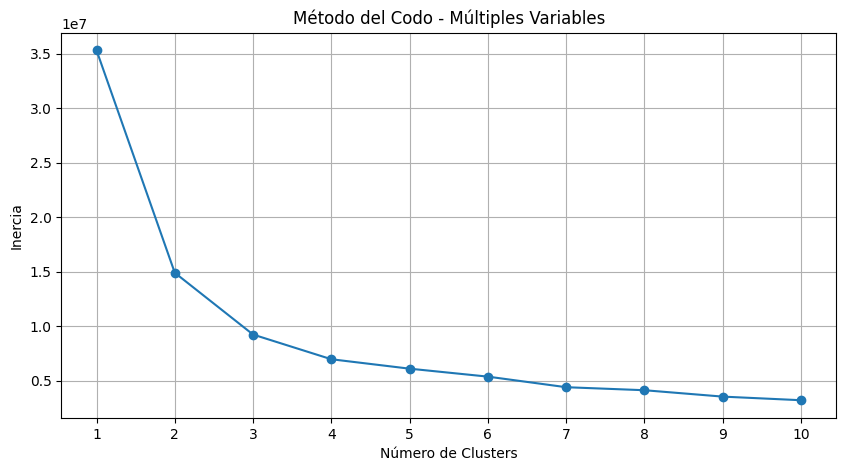

In [51]:
variables_segmentacion = df_knn_copia[['Cloud3pm', 'RISK_MM', 'Humidity3pm', 'Rainfall']].dropna()

k_range= range(1, 11)

resultado_multi = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(variables_segmentacion)
    resultado_multi.append(km.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), resultado_multi, marker='o')
plt.title("Método del Codo - Múltiples Variables")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [52]:

k = KneeLocator(range(1, 11), resultado_multi, curve="convex", direction="decreasing")

print("El codo está en k =", k.elbow)


El codo está en k = 3


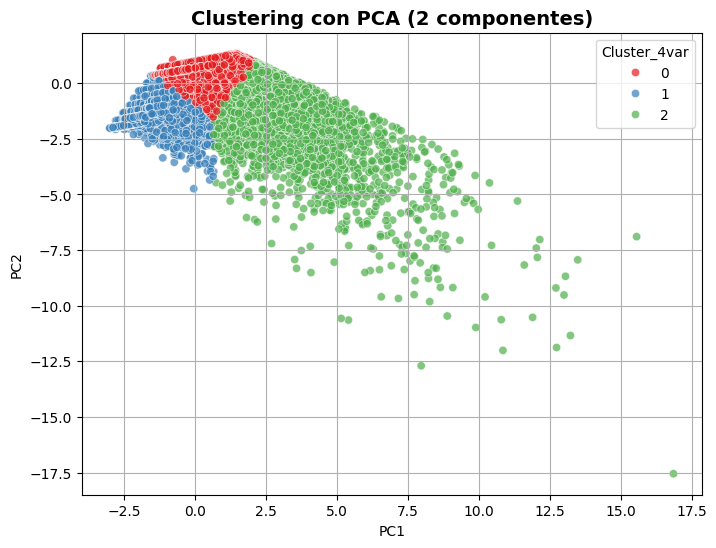

In [53]:
variables_segmentacion = df_knn_copia[['Cloud3pm', 'RISK_MM', 'Humidity3pm', 'Rainfall']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(variables_segmentacion)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)


df_pca_clusters = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca_clusters['Cluster_4var'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_clusters, x='PC1', y='PC2', hue='Cluster_4var', palette='Set1', alpha=0.7)
plt.title("Clustering con PCA (2 componentes)", fontsize=14, fontweight='bold')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster_4var")
plt.grid(True)
plt.show()

### Evaluación del modelo - 2 puntos

In [54]:
sil_score = silhouette_score(X_pca, clusters)
print(f"📈 Silhouette Score después de PCA: {sil_score:.4f}")

📈 Silhouette Score después de PCA: 0.5448


### Interpretación de la evaluación - 2 puntos

📈 Valor obtenido: 0.5448
Esto indica que los clusters generados tras aplicar PCA y luego segmentar con KMeans (k=3) tienen una buena calidad de agrupación.
Los datos dentro de cada grupo están bien cohesionados, y los diferentes clusters están claramente diferenciados entre sí.

### Análisis de la aplicación de PCA - 2 puntos

In [55]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


explained_var = pca.explained_variance_ratio_
print("📊 Varianza explicada por componente:")
print(f"PC1: {explained_var[0]:.4f}")
print(f"PC2: {explained_var[1]:.4f}")
print(f"Varianza total explicada: {explained_var.sum():.4f}")


componentes = pd.DataFrame(
    pca.components_,
    columns=variables_segmentacion.columns,
    index=['PC1', 'PC2']
)
print("\n📌 Cargas (Importancia de las variables en cada componente):")
print(componentes)




📊 Varianza explicada por componente:
PC1: 0.4312
PC2: 0.2299
Varianza total explicada: 0.6611

📌 Cargas (Importancia de las variables en cada componente):
     Cloud3pm   RISK_MM  Humidity3pm  Rainfall
PC1   0.44498  0.502608     0.597122  0.439116
PC2   0.73013 -0.288952     0.142288 -0.602637


Esto indica que PC1 representa condiciones húmedas y lluviosas.

PC2 diferencia entre días nublados sin lluvia y lluviosos sin tantas nubes.


### Análisis de uno de los grupos - 3 puntos

🔍 Análisis del Cluster 1
           Cloud3pm       RISK_MM   Humidity3pm      Rainfall
count  14228.000000  14228.000000  14228.000000  14228.000000
mean       1.980391      0.300583     37.328957      0.604411
std        1.459934      1.377605     16.491221      2.124113
min        0.000000      0.000000      0.000000      0.000000
25%        1.000000      0.000000     25.000000      0.000000
50%        2.000000      0.000000     37.000000      0.000000
75%        3.000000      0.000000     49.000000      0.000000
max        7.000000     25.800000     99.000000     27.400000


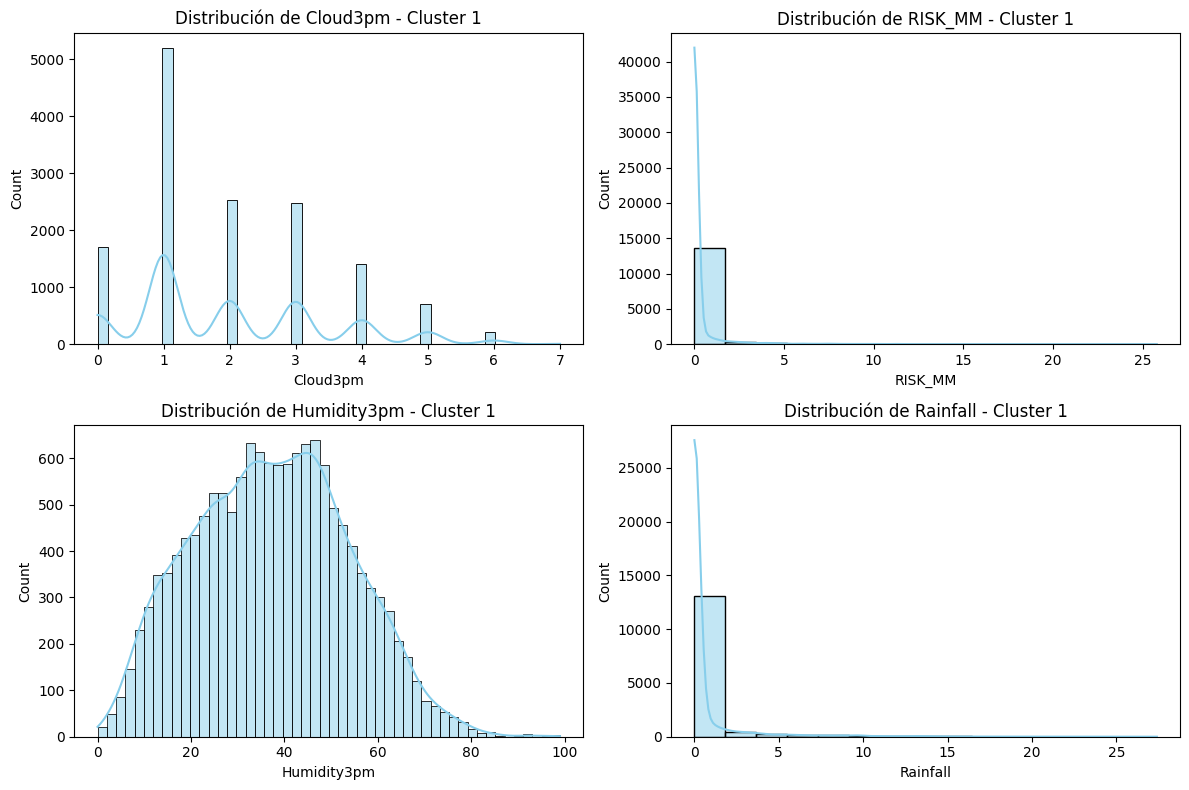

In [56]:

variables_segmentacion = df_knn_copia[['Cloud3pm', 'RISK_MM', 'Humidity3pm', 'Rainfall']].dropna()
vars_segmentacion = variables_segmentacion.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(variables_segmentacion)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)


df_pca_clusters = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=variables_segmentacion.index)
df_pca_clusters['Cluster_4var'] = clusters


cluster_id = 1
indices_cluster = df_pca_clusters[df_pca_clusters['Cluster_4var'] == cluster_id].index
grupo = variables_segmentacion.loc[indices_cluster]


print(f"🔍 Análisis del Cluster {cluster_id}")
print(grupo.describe())


plt.figure(figsize=(12, 8))
for i, var in enumerate(vars_segmentacion, 1):
    plt.subplot(2, 2, i)
    sns.histplot(grupo[var], kde=True, color='skyblue')
    plt.title(f'Distribución de {var} - Cluster {cluster_id}')
plt.tight_layout()
plt.show()



Cluster 1 representa días secos y poco nublados, caracterizados por:

Muy baja lluvia.

Bajo riesgo de lluvia al día siguiente.

Poca nubosidad en la tarde.

Humedad moderada o baja.



El Cluster 1 agrupa días con características predominantemente secas, poca nubosidad en la tarde y bajo riesgo de lluvia. Representa condiciones típicas de días estables, sin eventos meteorológicos relevantes.